In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import stats, spatial
import pickle
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [5]:
data_path = '../../data/tfidf_toprev_conlen_full_v2/'

In [6]:
prev_list = [i for i in os.listdir(data_path) if 'toprev' in i]

In [8]:
df = pd.read_csv(os.path.join(data_path,prev_list[0]), sep = '\t')

In [11]:
df.groupby('Author').agg(len).sort_values(by='index', ascending=False)

,index,AdditionalTags,ArchiveWarnings,Bookmarks,Category,ChapterIndex,Chapters,Characters,Comments,CompleteDate,...,Notes,PublishDate,Rating,Relationship,Summary,Title,URL,UpdateDate,Words,Cos
Author,,,,,,,,,,,,,,,,,,,,,
orphan_account,578,578,578,578,578,578.0,578,578,578,578,...,578,578,578,578,578,578,578,578,578.0,578.0
phoenixgirl26,566,566,566,566,566,566.0,566,566,566,566,...,566,566,566,566,566,566,566,566,566.0,566.0
Kusanosakura,333,333,333,333,333,333.0,333,333,333,333,...,333,333,333,333,333,333,333,333,333.0,333.0
Alisanne,327,327,327,327,327,327.0,327,327,327,327,...,327,327,327,327,327,327,327,327,327.0,327.0
sheltie1987,306,306,306,306,306,306.0,306,306,306,306,...,306,306,306,306,306,306,306,306,306.0,306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IBegToDreamAndDiffer,1,1,1,1,1,1.0,1,1,1,1,...,1,1,1,1,1,1,1,1,1.0,1.0
IBelieveInCastiel,1,1,1,1,1,1.0,1,1,1,1,...,1,1,1,1,1,1,1,1,1.0,1.0
caoty,1,1,1,1,1,1.0,1,1,1,1,...,1,1,1,1,1,1,1,1,1.0,1.0


In [76]:
df_a = df[df['Author'] == 'sheltie1987']

In [77]:
df_a = df_a.drop_duplicates(subset=['Title', 'Words'], keep="first")

In [78]:
len(df_a)

11

In [79]:
df_a['Kudos'] = df_a['Kudos']/df_a['Chapters']
df_a['Kudos'] = df_a['Kudos'].fillna(0)

In [80]:
df_a.sort_values(by='Cos', ascending=False)

,index,AdditionalTags,ArchiveWarnings,Author,Bookmarks,Category,ChapterIndex,Chapters,Characters,Comments,...,Notes,PublishDate,Rating,Relationship,Summary,Title,URL,UpdateDate,Words,Cos
48438,63736,"Explicit Sexual Content, non-beastality, Anima...",Creator Chose Not To Use Archive Warnings,sheltie1987,7,F/MOther,NaN,1,"Harry Potter, Hungarian Horntail",7,...,NaN,2016-01-30,Not Rated,Harry Potter/Hungarian Horntail,Harry has devised a different way in beating t...,How Harry Beat the Dragon,http://archiveofourown.org/works/5853238?view_...,NaN,915.0,0.665402
15566,94855,"Incest, Explicit Sexual Content, Explicit Lang...","Creator Chose Not To Use Archive Warnings, Rap...",sheltie1987,29,F/MF/FMulti,1.0,95,"Percy Jackson, Annabeth Chase, Reyna, Silena B...",0,...,Like my other series I have here there will be...,2013-03-15,Not Rated,Annabeth Chase/Percy Jackson,Just like HBG (Harry\'s Brainy Girls) and KG (...,"Percy Jackson and his Goddesses, Demigods &amp...",http://archiveofourown.org/works/721683/chapte...,2014-07-18,116648.0,0.578680
20165,128004,"Explicit Sexual Content, Explicit Language, Ad...",Creator Chose Not To Use Archive Warnings,sheltie1987,2,F/M,NaN,1,"Arthur Weasley, Narcissa Malfoy",2,...,NaN,2013-09-06,Not Rated,Arthur Weasley/Narcissa Malfoy,Narcissa needs a quick fix fast and goes to th...,An Office Quickie,http://archiveofourown.org/works/957308?view_a...,NaN,1347.0,0.475021
33463,95884,"Explicit Sexual Content, Explicit Language, Ag...",Creator Chose Not To Use Archive Warnings,sheltie1987,6,F/M,NaN,1,"Hermione Granger, Arthur Weasley",2,...,NaN,2014-12-05,Not Rated,Hermione Granger/Arthur Weasley,Arthur and Hermione have a nice late night mee...,Secret Night Rendezvous,http://archiveofourown.org/works/2722973?view_...,NaN,1470.0,0.465283
15829,130119,"Explicit Sexual Content, Explicit Language","Creator Chose Not To Use Archive Warnings, No ...",sheltie1987,4,F/M,NaN,1,"Hermione Granger, Neville Longbottom",3,...,NaN,2013-03-09,Explicit,Hermione Granger/Neville Longbottom,Basically what the title says. Neville and Her...,Fun in the Greenhouse,http://archiveofourown.org/works/714184?view_a...,NaN,1325.0,0.445066
17420,139851,"Explicit Sexual Content, Explicit Language, Or...",Creator Chose Not To Use Archive Warnings,sheltie1987,4,F/M,NaN,1,"Hermione Granger, Neville Longbottom",2,...,NaN,2013-05-24,Not Rated,Hermione Granger/Neville Longbottom,My second attempt in a Hermione/Neville M stor...,Lovely Afternoon,http://archiveofourown.org/works/815920?view_a...,NaN,1481.0,0.409185
20171,128414,"Explicit Sexual Content, Explicit Language, Ad...",Creator Chose Not To Use Archive Warnings,sheltie1987,5,F/M,NaN,1,"Hermione Granger, Arthur Weasley",7,...,NaN,2013-09-06,Not Rated,Hermione Granger/Arthur Weasley,Hermione has needs that her husband can\'t giv...,Satisfaction Guaranteed,http://archiveofourown.org/works/956949?view_a...,NaN,1271.0,0.406909
20129,125815,"Vaginal Fingering, Oral Sex, Explicit Sexual C...",Creator Chose Not To Use Archive Warnings,sheltie1987,2,F/FF/M,1.0,2,"Ginny Weasley, Narcissa Malfoy, Molly Weasley,...",2,...,NaN,2013-09-06,Not Rated,"Ginny Weasley/Narcissa Malfoy, Molly Welasey/D...",It\'s a pureblood tradition that the matriarch...,A Mother\'s Final Word,http://archiveofourown.org/works/956946/chapte...,NaN,3207.0,0.370662
15627,117532,"Bisexual Female Character, Explicit Sexual Con...","No Archive Warnings Apply, Rape/Non-Con",sheltie1987,122,F/MF/FMulti,1.0,259,"Harry Potter, Hermione Granger, Cho Chang, Pad...",9,...,NaN,2013-03-10,Not Rated,"Harry Potter/ Hermione Granger, Harry Potter/M...",Harry is paired up with every girl in the Pott...,Harry\'s Brainy Girls,http://archiveofourown.org/works/714677/chapte...,2016-04-22,304809.0,0.343633
16855,157656,"Explicit Sexual Content, Explicit Language, Pa...",Creator Chose Not To Use Archive Warnings,sheltie1987,24,F/MF/FMulti,1.0,6,"Harry Potter, Lily Potter, Hermione Granger, N...",0,...,NaN,2013-04-06,Not Rated,"Harry Potter/Lil

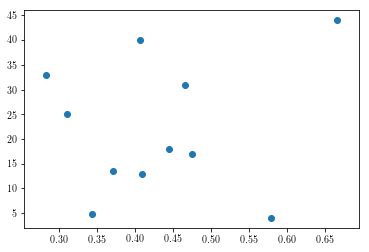

In [81]:
plt.scatter(df_a['Cos'], df_a['Kudos'])

14.327602382055693 18.041611833994224


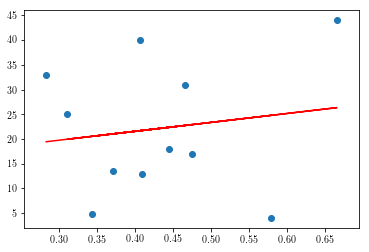

In [82]:
from numpy.polynomial.polynomial import polyfit

# Fit with polyfit
b, m = polyfit(df_a['Cos'], df_a['Kudos'], 1)
print(b, m)
plt.scatter(df_a['Cos'], df_a['Kudos'])
plt.plot(df_a['Cos'], b + m * df_a['Cos'], '-', color='red')